In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


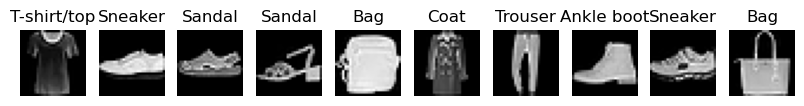

In [2]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(class_names[example_targets[i]])
    plt.axis('off')
plt.show()

In [3]:
from collections import Counter

labels = [label for _, label in train_dataset]
counts = Counter(labels)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i, count in counts.items():
    print(f"{class_names[i]}: {count}")


Ankle boot: 6000
T-shirt/top: 6000
Dress: 6000
Pullover: 6000
Sneaker: 6000
Sandal: 6000
Trouser: 6000
Shirt: 6000
Coat: 6000
Bag: 6000


In [4]:
for images, labels in train_loader:
    print("Batch images shape:", images.shape)
    print("Batch labels shape:", labels.shape)
    break


Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])


In [5]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cpu")
print("Using device:", device)

Using device: mps


In [6]:
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64*12*12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
epochs = 6

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.3782
Epoch 2, Loss: 0.2324
Epoch 3, Loss: 0.1764
Epoch 4, Loss: 0.1350
Epoch 5, Loss: 0.1005
Epoch 6, Loss: 0.0743


In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Test Accuracy:", correct/total)


Test Accuracy: 0.9255


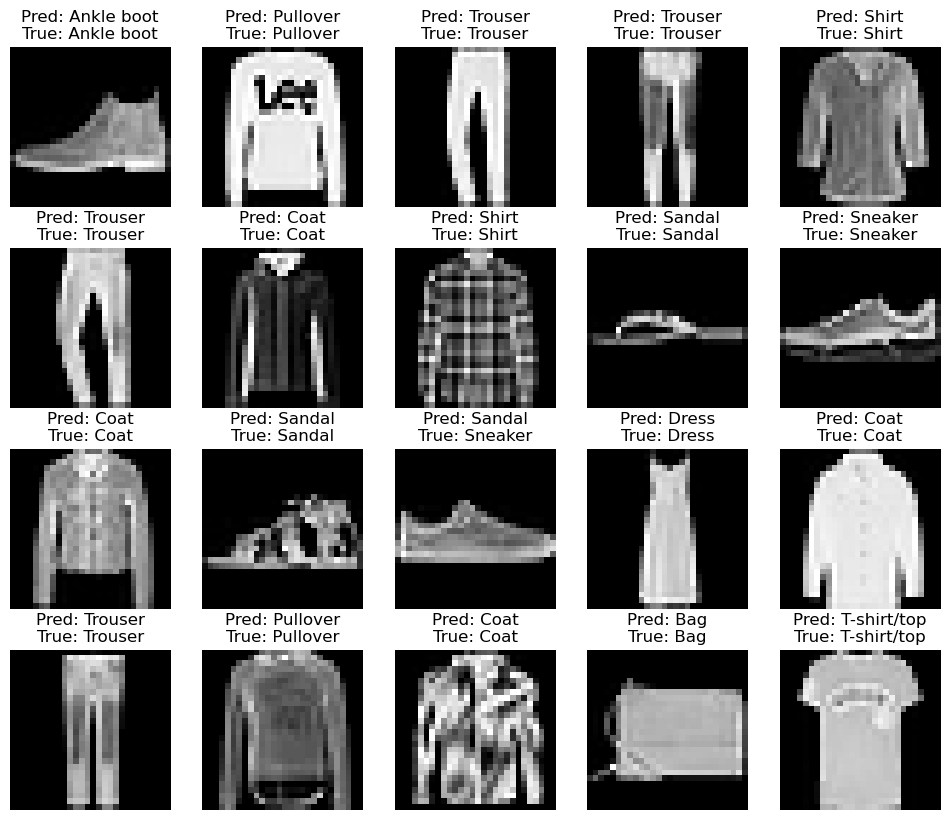

In [9]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

outputs = model(example_data.to(device))
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Pred: {class_names[preds[i]]}\nTrue: {class_names[example_targets[i]]}")
    plt.axis('off')
plt.show()
